In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from pynamicalsys import DiscreteDynamicalSystem as dds

In [2]:
ds = dds(model="extended standard nontwist map")

In [3]:
a = 0.805
b = 0.597
c = 0.005
m = 1
params = [a, b, c, m]
u = np.random.rand(500, 2)
trajectory = ds.trajectory(u, 5000, parameters=params)

In [4]:
# Define the symmetry line
symmetry_line = lambda v, parameters: 0.5 * np.ones_like(v)
# Define the type of the function, i.e., x = g(y)
axis = 1
# Define the period
period = 11
# Define the range of the initial search
y_range = (0.0, 0.22)
# Define the number of points in the range
num_points = 10000
# Define the initial conditions
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [8]:
periodic_orbit = ds.find_periodic_orbit(points, period, parameters=params, tolerance=tolerance, symmetry_line=symmetry_line, axis=axis, verbose=True, tolerance_decay_factor=0.7)

Iter 0: Δorbit=[0.5        0.18966997], Δbounds=[4.00000000e-04 2.59625963e-05], tol=2.00e-04
Iter 1: Δorbit=[0. 0.], Δbounds=[0.00028    0.00025404], tol=1.40e-04
Iter 2: Δorbit=[0.00000000e+00 2.32467471e-06], Δbounds=[1.96000000e-04 6.43724703e-06], tol=9.80e-05
Iter 3: Δorbit=[0.00000000e+00 2.77555756e-17], Δbounds=[0.0001372  0.00013076], tol=6.86e-05
Iter 4: Δorbit=[0.00000000e+00 7.84654984e-08], Δbounds=[9.60400000e-05 3.15346748e-06], tol=4.80e-05
Iter 5: Δorbit=[0.00000000e+00 2.77555756e-17], Δbounds=[6.72280000e-05 6.40745325e-05], tol=3.36e-05
Iter 6: Δorbit=[0.00000000e+00 1.92242822e-08], Δbounds=[4.70596000e-05 1.54579346e-06], tol=2.35e-05
Iter 7: Δorbit=[0. 0.], Δbounds=[3.29417200e-05 3.13959265e-05], tol=1.65e-05
Iter 8: Δorbit=[0.00000000e+00 3.13990661e-09], Δbounds=[2.30592040e-05 7.56987902e-07], tol=1.15e-05
Iter 9: Δorbit=[0. 0.], Δbounds=[1.61414428e-05 1.53844549e-05], tol=8.07e-06
Iter 10: Δorbit=[0.00000000e+00 1.53859933e-09], Δbounds=[1.12990100e-05 3.7

In [9]:
periodic_orbit

array([0.5       , 0.18966754])

In [11]:
n_points = 100000
n_u = [30, 97]
n_s = [78, 20]
delta = 2e-3
wu = ds.manifold(periodic_orbit, period, parameters=params, n_points=n_points, iter_time=n_u, delta=delta)
ws = ds.manifold(periodic_orbit, period, parameters=params, n_points=n_points, iter_time=n_s, stability="stable", delta=delta)

(0.41, 0.1)

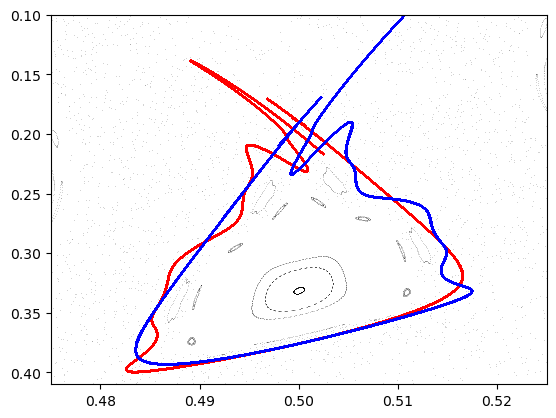

In [12]:
plt.plot(trajectory[:, 0], trajectory[:, 1], "ko", markersize=0.25, markeredgewidth=0)
ms = 1
plt.plot(wu[0][:, 0], wu[0][:, 1], "ro", markersize=ms, markeredgewidth=0)
plt.plot(wu[1][:, 0], wu[1][:, 1], "ro", markersize=ms, markeredgewidth=0)

plt.plot(ws[0][:, 0], ws[0][:, 1], "bo", markersize=ms, markeredgewidth=0)
plt.plot(ws[1][:, 0], ws[1][:, 1], "bo", markersize=ms, markeredgewidth=0)

plt.xlim(0.475, 0.525)
plt.ylim(0.41, 0.1)
# plt.axis("off")
# plt.savefig("manifold.png", dpi=500, bbox_inches="tight")